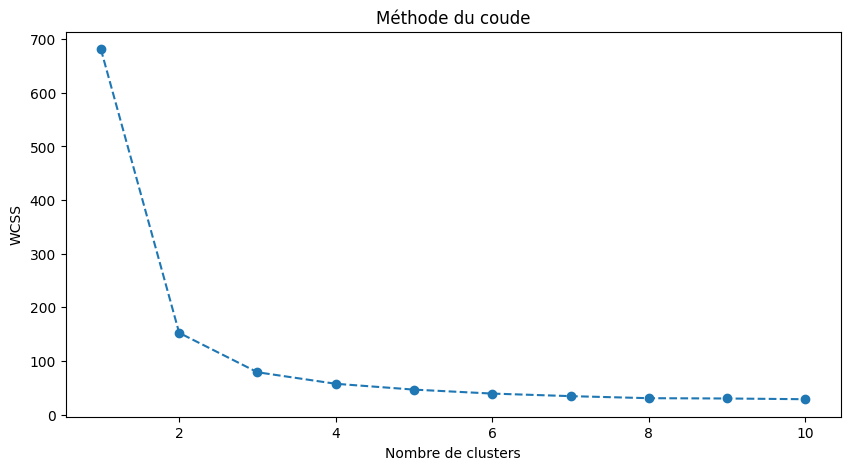

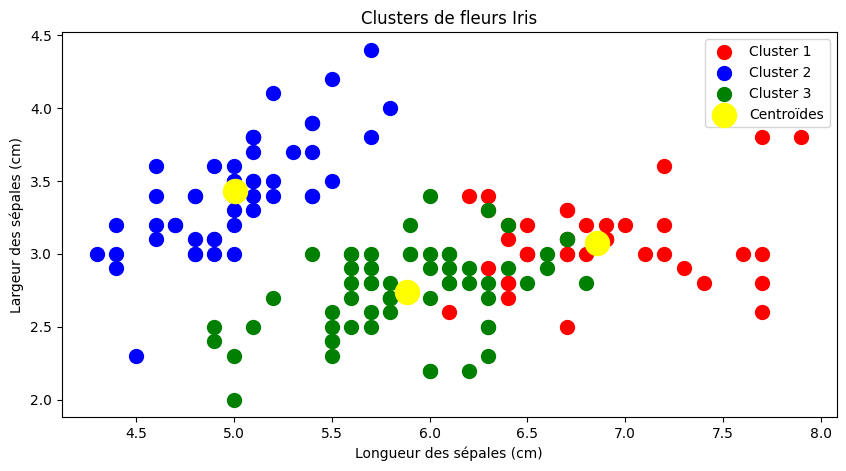

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Charger l'ensemble de données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualiser les clusters
plt.figure(figsize=(10,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroïdes')

plt.title('Clusters de fleurs Iris')
plt.xlabel('Longueur des sépales (cm)')
plt.ylabel('Largeur des sépales (cm)')
plt.legend()
plt.show()